# Hypothesis Testing with Insurance Data (Practice)


## Instructions

<p>For this assignment, we will be working with the <a href="https://drive.google.com/file/d/1zkcVqin1DV7ym7DFPVovCCsqkoiDZs-6/view?usp=sharing" target="_blank">US Health Insurance Dataset</a> (originally from <a href="https://www.kaggle.com/teertha/ushealthinsurancedataset" target="_blank">Kaggle</a>).</p>
<p>We have been asked to use our hypothesis testing skills to answer the following questions:</p>
<p>- Q1. Do smokers have higher insurance charges than non-smokers?<br>- Q2. Are men more likely to smoke than women?<br>- Q3. Do different regions have different charges, on average?<br></p>
<p><br></p>
<p>For each question, make sure to:</p>
<ol><li>State your Null Hypothesis and Alternative Hypothesis</li><li>Select the correct test according to the data type and number of samples</li><li>Test the assumptions of your selected test.</li><li>Execute the selected test, or the alternative test (if you do not meet the assumptions)</li><li>Interpret your p-value and reject or fail to reject your null hypothesis </li><li>Show a supporting visualization that helps display the result</li></ol>
<p><br></p>
<p><br></p>

# Reference: Guide-Choosing the Right Hypothesis Test

## STEP 1: Stating our Hypothesis

- **Before selecting the correct hypothesis test, you must first officially state your null hypothesis and alternative hypothesis. You should also define your** **significance** **value (alpha).**
- **Before stating your hypotheses, ask yourself**
  1. What question am I attempting to answer?
  2. What metric/value do I want to measure to answer this question?
  3. Do I expect the groups to be different in a specific way? (i.e., one group is greater than the other).
     - Or do I just think they'll be different but don't know how?
- **Now formally declare your hypotheses after asking yourself the questions above:**

## STEP 2: Determine the category/type of test based on your data.

- **Q1: What type of data do I have:**
  - Numeric?
  - Categorical?
- **Q2: How many samples/groups am I comparing?**
  - 1 sample vs. a known quantity?
    - Example: comparing our 1 potential alien height against the population.
  - 2 samples/groups:
    - Example: Comparing the effect of Drug A vs. the effect of a Placebo.
  - More than 2 samples/groups:
    - Example: results of 3 different diets

Use the table below to look up the correct test according to your answers

- Use the table below to look up the correct test according to your answers

| What type of comparison?         | Numeric Data       | Categorical Data |
| -------------------------------- | ------------------ | ---------------- |
| Sample vs. Known Quantity/Target | 1 Sample T-Test    | Binomial Test    |
| 2 Samples                        | 2 Sample T-Test    | Chi-Square       |
| More than 2                      | ANOVA and/or Tukey | Chi-Square       |

## STEP 3: Does the data meet the assumptions of the selected test?

### ASSUMPTIONS SUMMARY

- [One-Sample T-Test](https://statistics.laerd.com/spss-tutorials/one-sample-t-test-using-spss-statistics.php)
  - No significant outliers
  - Normality
- [Independent t-test (2-sample)](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php)
  - No significant outliers
  - Normality
  - Equal Variance
- [One Way ANOVA](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)
  - No significant outliers
  - Equal variance
  - Normality
- [Binomial Test](https://statistics.laerd.com/spss-tutorials/binomial-test-using-spss-statistics.php)
  - There are 2 possible outcomes: success and failure.
  - The probability of success is constant.
  - The trials are independent.
- [Chi-Square test](https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php)
  - There are two categorical variables (ordinal or nominal)
  - The outcomes are independent.

### HOW TO: TEST ASSUMPTIONS AND SELECT THE CORRECT TEST

#### 0. Check for & Remove Outliers

- Required for 1-sample t-test and ANOVA.
- Use one of the two methods below to identify outliers:
  - Use Tukey's interquartile range rule.
  - Use the absolute value of Z-scores >3 as a rule.

#### 1. **Test Assumption of Normality**

- Use either of the following tests to determine if your data is normally distributed:
  - D'Agostino-Pearson's normality test `scipy.stats.normaltest`
  - Shapiro-Wilk Test (if n <20) `scipy.stats.shapiro`
- **Outcome A: if your data IS normally distributed:**
  - Move onto assumption #2: testing the assumption of equal variance.
- **Outcome B: If your data is NOT normally distributed:**
  - If your group sizes (n) are large enough, we can safely ignore the normality assumption.
    - See the table below for the sample size guidelines:

| Parametric Test | Sample size guidelines for non-normal data                   |
| --------------- | ------------------------------------------------------------ |
| 1-sample t-test | Greater than 20                                              |
| 2-sample t-test | Each group should be greater than 15                         |
| One-Way ANOVA   | If there are 2-9 groups, each group n >= 15. If there are 10-12 groups, each group n>20. |



- Outcome B1: if your N is large enough to ignore the assumption of normality:

  - Move onto assumption #2: testing the assumption of equal variance.

- Outcome B2: if your N is NOT large enough:

  :

  - You should not run the selected test.
  - Move onto step 3: selecting the non-parametric equivalent test.

#### 2. **Test Assumption of Equal Variance**

- Levene's Test `scipy.stats.levene`

- **If you pass the assumption of equal variance:**

- - Use the regular 2-sample t-test (or ANOVA).
  - See the Final Summary Table at the bottom for the function to use.

- **If you fail the assumption of equal variance:**

  - If you wanted to run a 2-sample T-Test:
    - Use a Welch's T-Test.
    - for scipy, add `equal_var=False` to `ttest_ind`
  - If you wanted to do a different test:
    - See 3. Select a non-parametric equivalent of your test

#### 3. **Select a non-parametric equivalent of your test.**

- **Select the test from the right Nonparametric column that matches your original Parametric test.**
- The nonparametric test functions are used the same way as the parametric test. No other changes needed
- For more information, see: [Choosing Between Parametric and Non-Parametric Tests](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test).

### Summary Table - Hypothesis Testing Functions

- All functions below are located in the stats module of Scipy. See this cheat sheet for more info on each of them [cheatsheet: Hypothesis Testing with Scipy](https://drive.google.com/open?id=1EY4UCg20HawWlWa50M2tFauoKBQcFFAW)

```
from scipy import stats
copy
```

| Parametric tests (means) | Function                   | Nonparametric tests (medians) | Function                     |
| ------------------------ | -------------------------- | ----------------------------- | ---------------------------- |
| **1-sample t-test**      | `stats.ttest_1samp()`      | **1-sample Wilcoxon**         | `scipy.stats.wilcoxon`       |
| **2-sample t-test**      | `stats.ttest_ind()`        | **Mann-Whitney U test**       | `scipy.stats.mannwhitneyu()` |
| **One-Way ANOVA**        | `stats.f_oneway()`         | **Kruskal-Wallis**            | `stats.kruskal`              |
| **Binomial test**        | `stats.binom_test()`       | N/A                           | N/A                          |
| **Chi-Square test**      | `stats.chi2_contingency()` | N/A                           | N/A                          |

## STEP 4: Perform the Test & Interpret the Result

- Perform a hypothesis test from the summary table above to get your p-value.
- If the p-value is > alpha:
  - We fail to reject the null hypothesis. There is no significant difference between groups.



- **If the p-value is < alpha:**
  - Reject the null hypothesis. There is a significant difference between groups. We have supported the alternative hypothesis.
  - If you have multiple groups (i.e., ANOVA, Kruskal-Wallis), see Step 4: Post-Hoc Tests in order to determine which groups were different.



## STEP 5: Post-hoc multiple comparison tests (if needed)

- Our p-value indicated there WAS a significant difference between groups, but we don't know WHICH groups yet.
- We must run a pairwise Tukey's test to know which groups were significantly different.
- Tukey pairwise comparison test
  - `statsmodels.stats.multicomp.pairwise_tukeyhsd`
- Tukey's test will run separate tests on pair of groups to get a separate p-value for each. But it does it in a smart way that prevents false positives.

## Summary

This lesson provides an overview of hypothesis testing and talks through the process required to select the appropriate test. You may wish to refer to this page as a reference when you plan a hypothesis test.

# Solution

In [1]:
## import the standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## import hypothesis testing functions
from scipy import stats

In [2]:
# Load in the insurance.csv in the data folder and display preview
df = pd.read_csv("Data/insurance.csv")
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##  Q1. Do smokers have higher insurance charges than non-smokers?

### State the Hypothesis & Null Hypothesis 



- Null Hypothesis ($H_0$): There is no difference in charges for smokers vs. nonsmokers
- Alternative Hypothesis ($H_A$): There is a difference in charges for smokers vs. non
- Alpha:  0.05

### Selecting the Correct Hypothesis Test

Based upon the [Choosing the Right Hypothesis Test workflow from  the LP]( https://login.codingdojo.com/m/689/16351/121313):

- What type of data? Numeric/Categorical?
    - Numeric (insurance charges)
    
    
- What type of comparison?
    - 2 groups/samples
    
- Therefore the correct test is:     
    - 2-sample t-test, A.K.A. an independent t-test.



- **Assumptions of 2-sample T-Test:** 
    - No significant outliers
    - Normality
    - Equal Variance

In [3]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
# filter into groups based on smokers or not
smokers = df.loc[df['smoker'] == 'yes'].copy()
non = df.loc[df['smoker'] == 'no'].copy()

In [5]:
smokers_charge = smokers['charges']
non_charge = non['charges']

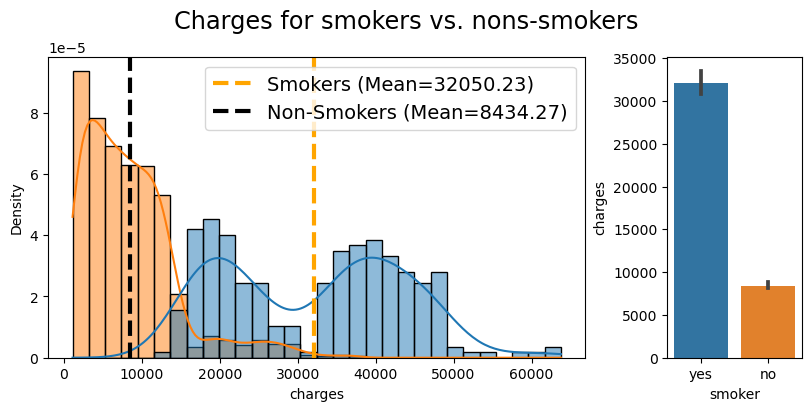

In [6]:
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (8,4), ncols=2,
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(smokers_charge), ls='--',lw=3,
           label=f"Smokers (Mean={np.mean(smokers_charge):.2f})",color='orange')

ax.axvline(np.mean(non_charge), ls='--', lw=3,
           label=f"Non-Smokers (Mean={np.mean(non_charge):.2f})",color='black')

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar)
fig.suptitle('Charges for smokers vs. nons-smokers',fontsize='xx-large');

### Check Test Assumptions

#### No Outliers

In [7]:
# Find and remove outliers for smokers
zscores= stats.zscore(smokers_charge)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [8]:
# Find and remove outliers for non smokers
zscores= stats.zscore(non_charge)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [9]:
# Removing outliers from non smokers
non_charge = non_charge[~outliers]
non_charge

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Normality

In [10]:
# Test for normality (or skip)
# - We can skip this step since both groups are greater than n = 15)

#### Equal Variance

In [11]:
# Test for variance
result = stats.levene(smokers_charge, non_charge)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [12]:
result.pvalue<.05

True

- The null hypothesis of the Levene's test is that the samples DO have equal variance. 
    - Therefore, our significant p-value indicates that we do NOT have equal varaince. 

- Therefore, we will run the Welch's t-test instead of the default (for scipy's ttest_ind change the equal_var argument to False)

### Final Test

In [13]:
# Since not equal variances, set equal_var = False
result = stats.ttest_ind(smokers_charge, non_charge, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

In [14]:
result.pvalue<.05

True

- Our Welch's T-Test return a p-value < .05 therefore we can reject the null hypothesis and support the alternative hypothesis that there is a significant difference in insurance charges for smokers vs. non-smokers.

- In order to know if they are have higher or lower charges, we look at the actual means of our final groups.

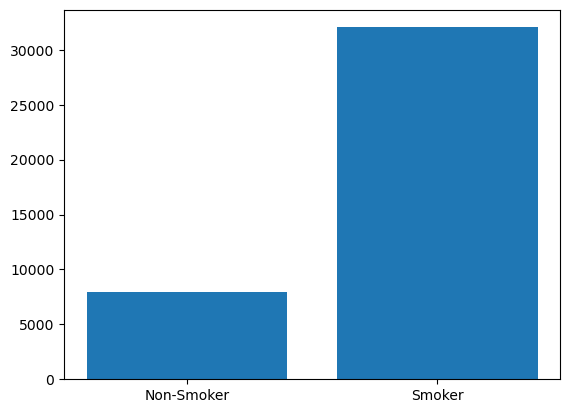

In [15]:
plt.bar(['Non-Smoker','Smoker'],[non_charge.mean(), smokers_charge.mean()]);

## Q2. Are men more likely to smoke than women?

### State the Hypothesis & Null Hypothesis 



- Null Hypothesis ($H_0$):Men and women are equally likely to be smokers. 

- Alternative Hypothesis ($H_A$): Men or women are more likely to be smokers.

### Selecting the Correct Hypothesis Test

Based upon the [Choosing the Right Hypothesis Test workflow from  the LP]( https://login.codingdojo.com/m/689/16351/121313):

- What type of data? Numeric/Categorical?
    - Categorical (Member of smoker/non-smoker)
    
    
- What type of comparison?
    - 2 groups/samples (Males vs Females)
    
- Therefore the correct test is:     
    - Chi-Squared Contingency Test



- **Assumptions of Chi-Square Test:** 
  - There are two categorical variables (ordinal or nominal)
  - The outcomes are independent.

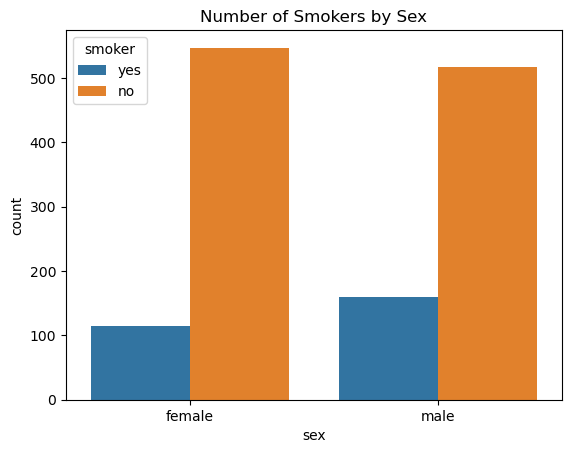

In [16]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [17]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [18]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [19]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Our p-value is < our alpha of .05, so we reject the null hypothesis that men and women are equally liklely to be smokers. 

We must examine the % of males vs. females who smoke to confirm if males smoke more or less.

<Axes: xlabel='sex', ylabel='Probability'>

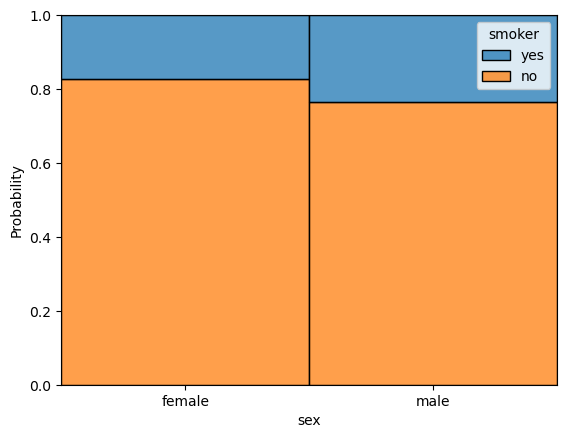

In [20]:
sns.histplot(data=df, x='sex', hue='smoker', stat='probability',
            multiple='fill')

Men are signficantly more likely to be smokers than women.

## Q3. Do different regions have different charges, on average?

### State the Hypothesis & Null Hypothesis 



- Null Hypothesis ($H_0$): Insurance charges are the same across regions.

- Alternative Hypothesis ($H_A$): Insurance charges are different across regions.

### Selecting the Correct Hypothesis Test

<Axes: xlabel='region', ylabel='charges'>

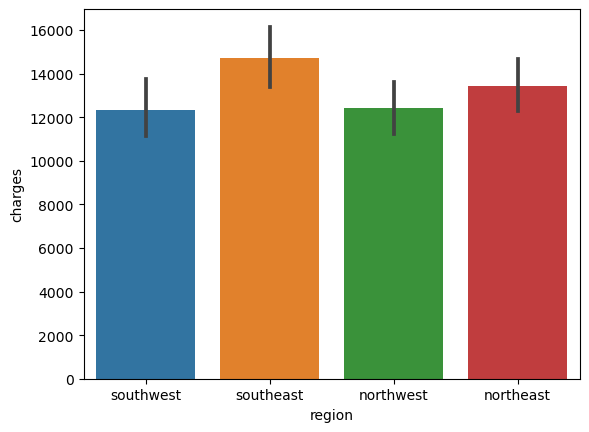

In [21]:
sns.barplot(data = df, x = 'region', y  = 'charges')

Based upon the [Choosing the Right Hypothesis Test workflow from  the LP]( https://login.codingdojo.com/m/689/16351/121313):

- What type of data? Numeric/Categorical?
    - Numeric (Charges)
    
    
- What type of comparison?
    - More than 2 groups/samples (4 groups)
    
- Therefore the correct test is:     
    - ANOVA




- **Assumptions of ANOVA:** 
    - No significant outliers
    - Equal variance
    - Normality

### Testing ANOVA Assumptions

In [22]:
# Create groups dictionary.
groups = {}

## Loop through all unique categories
for region in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==region,'charges'].copy()

    # save into the dictionary
    groups[region] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### No Outliers

In [35]:
## Loop through groups
groups_clean = {}

for group, data in groups.items():
    
    ## Get series for group and rename
    outliers = np.abs(stats.zscore(data))>3
    n_outliers = np.sum(outliers)
    
    print(f"- For {group}, there were {n_outliers} outliers removed.")
    clean_data = data[~outliers]

    # save into the clean dictionary
    groups_clean[group] = clean_data
    
groups_clean.keys()

- For southwest, there were 8 outliers removed.
- For southeast, there were 2 outliers removed.
- For northwest, there were 7 outliers removed.
- For northeast, there were 4 outliers removed.


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Normality

In [38]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = []
for group, data in groups_clean.items():
    
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results.append({'group':group, 'n': len(data),
                         'p':p, 'test stat':stat, 'sig?':p<.05})
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results)
norm_results_df

,group,n,p,test stat,sig?
0,southwest,317,7.728611e-22,97.223886,True
1,southeast,362,1.936990e-13,58.544942,True
2,northwest,318,2.940543e-19,85.341045,True
3,northeast,320,3.557877e-17,75.749565,True


- None of the groups are normally disributed, BUT our groups are greater than n =15 so we can safely disregard the assumption of normality.

### Testing Assumption of Equal Variance

In [40]:
# with the * operator
res = stats.levene(*groups_clean.values())
res

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [41]:
res.pvalue<.05

True

- The null hypothesis of the Levene's test is that the samples DO have equal variance. 
    - Therefore, our significant p-value indicates that we do NOT have equal varaince. 

- Therefore, we will run the Kruskal-Wallis test instead of the ANOVA test.

### Final Hypothesis Test

In [42]:
# Run the kruskal wallis test
res = stats.kruskal(*groups_clean.values())
res

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

In [43]:
res.pvalue<.05

False

Our p-value is greater than 0.05, so no we fail to reject the null hypothesis. 

There are no significant difference between regions.